
# <span style="color:rgb(213,80,0)">exercise6\_edge\_detection\_hallway.m</span>

Exercise 6 – Edge detection & Hough transform on hallway.png

<pre>
1) Sobel gradient magnitude and direction
2) Global thresholding with multiple options
3) BONUS: Hough line detection, visualization, and vanishing point analysis
</pre>

Author: ANGELOS NIKOLAOS POTAMIANOS Date : MAY 2025


In [1]:
clear; close all; clc;

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Parameters \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [2]:
imgPath = fullfile('Images','Ασκηση 6','hallway.png');
thresholds = [0.1, 0.2, 0.3, 0.4];  % Multiple thresholds to test
save_results = true;                 % Flag to save result images

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Load image \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [3]:
fprintf('Loading image from %s...\n', imgPath);

Loading image from Images\Ασκηση 6\hallway.png...

In [4]:
Irgb = imread(imgPath);
if ndims(Irgb)==3
    fprintf('Converting RGB to grayscale...\n');
    Igray = rgb2gray(Irgb);
else
    Igray = Irgb;
end
I = im2double(Igray);
fprintf('Image dimensions: %d x %d\n', size(I,1), size(I,2));

Image dimensions: 1168 x 1752

## 1. Sobel gradients \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [5]:
fprintf('\n--- STEP 1: Calculating Sobel gradients ---\n');

--- STEP 1: Calculating Sobel gradients ---


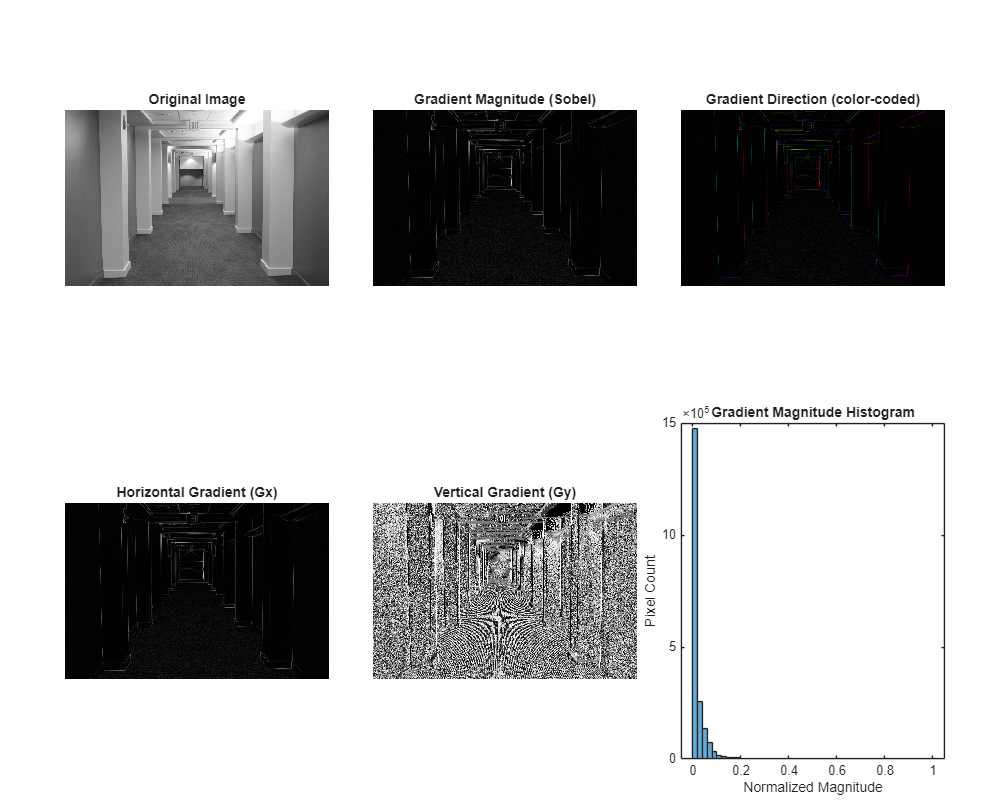

In [6]:

% Calculate both magnitude and direction
[Gmag, Gdir] = imgradient(I,'sobel');
% Also get separate X and Y gradients for visualization
[Gx, Gy] = imgradient(I,'sobel');

% Normalize for display
Gmag_norm = mat2gray(Gmag);
Gx_norm = mat2gray(abs(Gx));  % Take absolute for better visualization
Gy_norm = mat2gray(abs(Gy));

% Create visualization figure
figure('Name', 'Gradient Analysis', 'Position', [100, 100, 1000, 800]);
tiledlayout(2, 3, 'Padding', 'compact', 'TileSpacing', 'compact');

% Original image
ax1 = nexttile;
imshow(I);
title('Original Image');

% Gradient magnitude
ax2 = nexttile;
imshow(Gmag_norm);
title('Gradient Magnitude (Sobel)');

% Direction visualization using HSV color mapping
ax3 = nexttile;
hsv_img = zeros(size(I,1), size(I,2), 3);
hsv_img(:,:,1) = (Gdir + 180) / 360;  % Hue from direction
hsv_img(:,:,2) = ones(size(I));       % Full saturation
hsv_img(:,:,3) = Gmag_norm;           % Value from magnitude
rgb_dir = hsv2rgb(hsv_img);
imshow(rgb_dir);
title('Gradient Direction (color-coded)');

% X gradient
ax4 = nexttile;
imshow(Gx_norm);
title('Horizontal Gradient (Gx)');

% Y gradient
ax5 = nexttile;
imshow(Gy_norm);
title('Vertical Gradient (Gy)');

% Gradient statistics
ax6 = nexttile;
histogram(Gmag_norm(:), 50);
title('Gradient Magnitude Histogram');
xlabel('Normalized Magnitude');
ylabel('Pixel Count');

if save_results
    saveas(gcf, 'hallway_gradients.png');
end


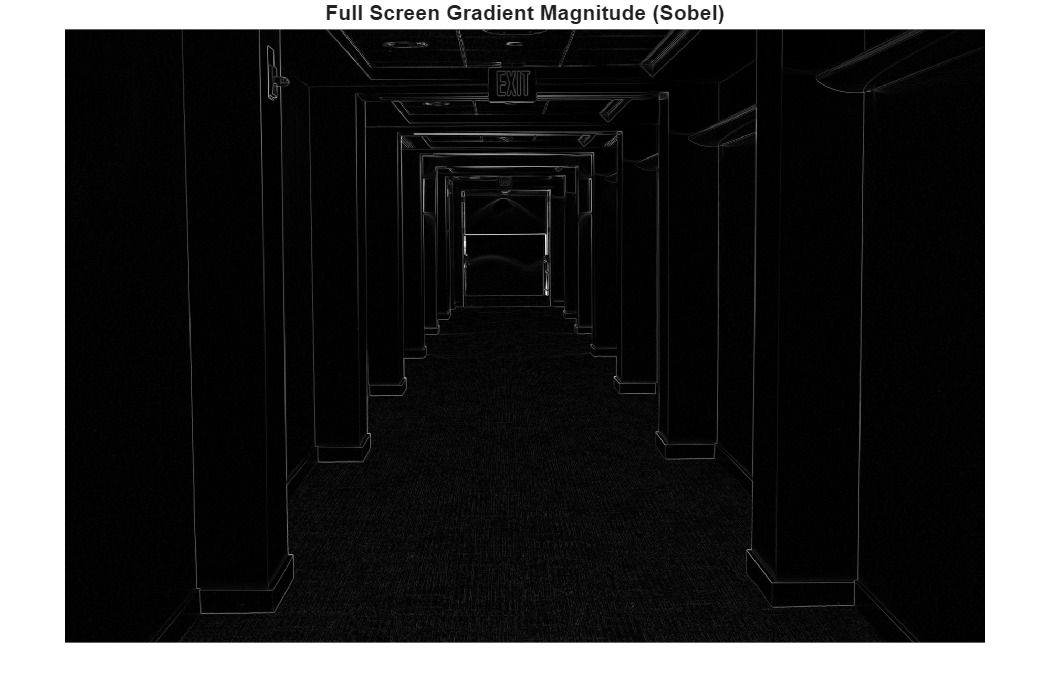

In [7]:

% Full-screen display of Sobel gradient magnitude
figure('Name', 'Sobel Gradient Magnitude - Full Screen', 'WindowState', 'maximized');
imshow(Gmag_norm);
title('Full Screen Gradient Magnitude (Sobel)', 'FontSize', 16);
if save_results
    saveas(gcf, 'hallway_gradient_fullscreen.png');
end

In [8]:

% Print statistics about the gradient
fprintf('Gradient statistics:\n');

Gradient statistics:

In [9]:
fprintf('  Maximum gradient magnitude: %.4f\n', max(Gmag(:)));

  Maximum gradient magnitude: 2.8628

In [10]:
fprintf('  Mean gradient magnitude: %.4f\n', mean(Gmag(:)));

  Mean gradient magnitude: 0.0696

In [11]:
fprintf('  Median gradient magnitude: %.4f\n', median(Gmag(:)));

  Median gradient magnitude: 0.0314

## 2. Global threshold (Otsu and alternatives) \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [12]:
fprintf('\n--- STEP 2: Edge Detection with Thresholding ---\n');

--- STEP 2: Edge Detection with Thresholding ---

In [13]:

% Calculate Otsu's threshold
T_otsu = graythresh(Gmag_norm);
fprintf('Otsu threshold = %.3f (%.1f%% of max)\n', T_otsu, T_otsu*100);

Otsu threshold = 0.125 (12.5% of max)


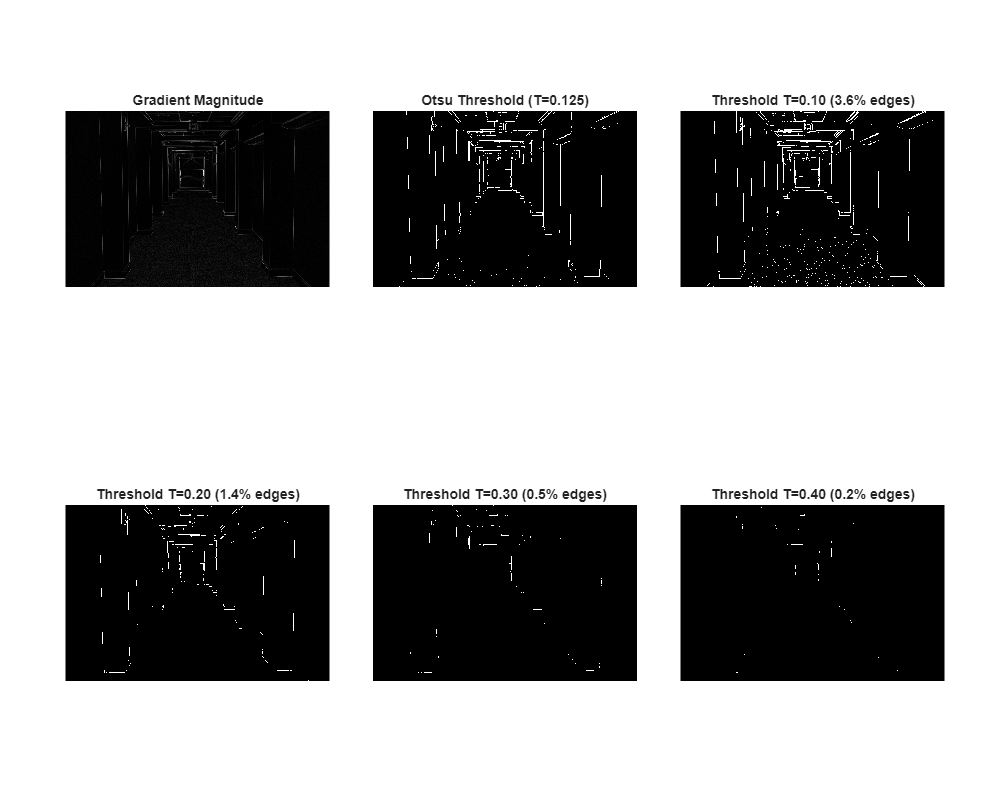

In [14]:

% Create a figure to compare different thresholds
figure('Name', 'Threshold Comparison', 'Position', [100, 100, 1000, 800]);
tiledlayout(2, 3, 'Padding', 'compact', 'TileSpacing', 'compact');

% Original gradient magnitude
ax1 = nexttile;
imshow(Gmag_norm);
title('Gradient Magnitude');

% Otsu threshold
BW_otsu = imbinarize(Gmag_norm, T_otsu);
ax2 = nexttile;
imshow(BW_otsu);
title(sprintf('Otsu Threshold (T=%.3f)', T_otsu));

% Test multiple thresholds
for i = 1:length(thresholds)
    T = thresholds(i);
    BW = imbinarize(Gmag_norm, T);

    % Calculate edge statistics
    edge_pixels = sum(BW(:));
    edge_percentage = 100 * edge_pixels / numel(BW);

    % Display result
    ax_i = nexttile(i+2);
    imshow(BW);
    title(sprintf('Threshold T=%.2f (%.1f%% edges)', T, edge_percentage));
end

if save_results
    saveas(gcf, 'hallway_thresholds.png');
end


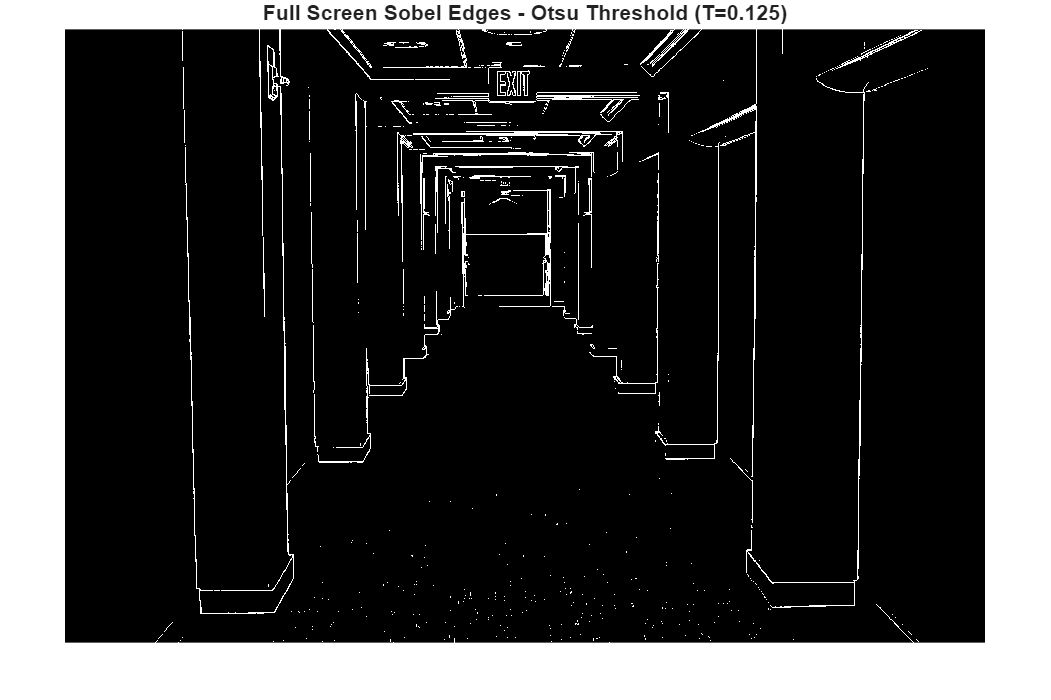

In [15]:

% Full-screen display of Otsu threshold result
figure('Name', 'Otsu Threshold Result - Full Screen', 'WindowState', 'maximized');
imshow(BW_otsu);
title(sprintf('Full Screen Sobel Edges - Otsu Threshold (T=%.3f)', T_otsu), 'FontSize', 16);
if save_results
    saveas(gcf, 'hallway_otsu_fullscreen.png');
end

## 3. BONUS – Hough Transform for Line Detection \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [16]:
fprintf('\n--- STEP 3: Hough Transform for Line Detection ---\n');

--- STEP 3: Hough Transform for Line Detection ---

In [17]:

% Create Canny edges for better Hough input (cleaner edges)
fprintf('Generating Canny edges...\n');

Generating Canny edges...


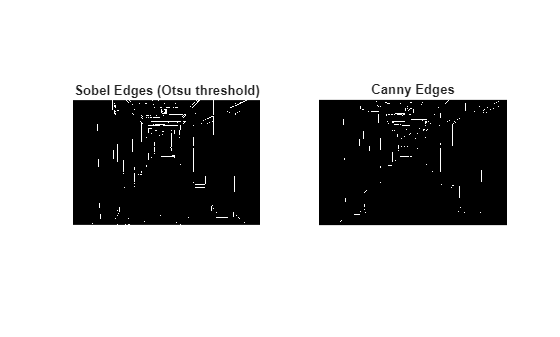

In [18]:
sigma = 2.0;  % Gaussian smoothing parameter to suppress texture
low_thresh = 0.05;  % Low threshold for hysteresis
high_thresh = 0.20; % High threshold for hysteresis
BWcanny = edge(I, 'canny', [low_thresh high_thresh], sigma);

% Compare Sobel vs Canny as input to Hough
figure('Name', 'Edge Detection Comparison');
subplot(1,2,1);
imshow(BW_otsu);
title('Sobel Edges (Otsu threshold)');

subplot(1,2,2);
imshow(BWcanny);
title('Canny Edges');

if save_results
    saveas(gcf, 'hallway_edges_comparison.png');
end


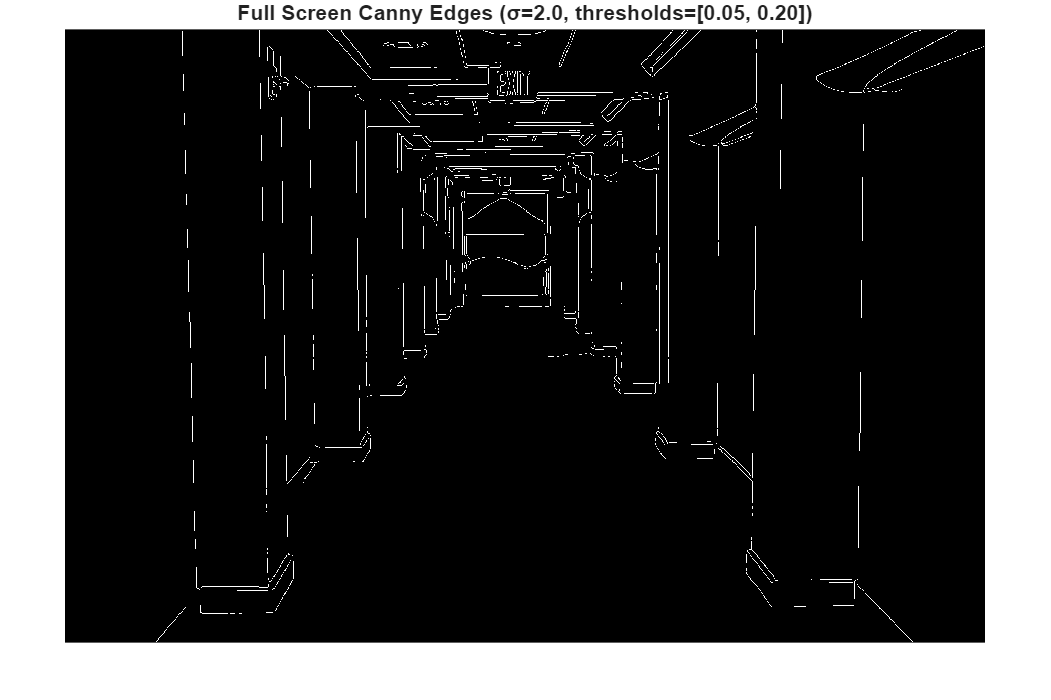

In [19]:

% Full-screen display of Canny edges
figure('Name', 'Canny Edges - Full Screen', 'WindowState', 'maximized');
imshow(BWcanny);
title('Full Screen Canny Edges (σ=2.0, thresholds=[0.05, 0.20])', 'FontSize', 16);
if save_results
    saveas(gcf, 'hallway_canny_fullscreen.png');
end

In [20]:

% Compute Standard Hough Transform
fprintf('Computing Hough transform...\n');

Computing Hough transform...

In [21]:
[H, theta, rho] = hough(BWcanny);

% Find peaks in Hough space
num_peaks = 12;
threshold_percentage = 0.30;
peak_threshold = threshold_percentage * max(H(:));
fprintf('Finding Hough peaks (threshold: %.1f%% of max)...\n', threshold_percentage*100);

Finding Hough peaks (threshold: 30.0% of max)...


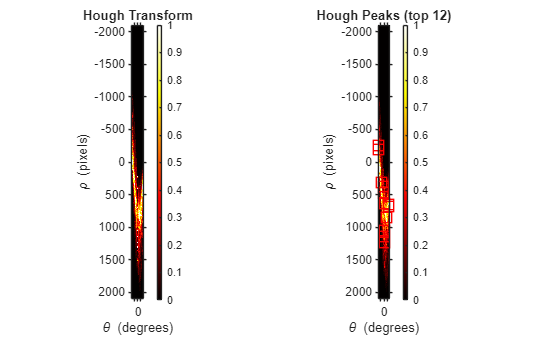

In [22]:
P = houghpeaks(H, num_peaks, 'Threshold', peak_threshold);

% Visualize Hough transform and peaks
figure('Name', 'Hough Transform Visualization');
subplot(1,2,1);
imshow(imadjust(mat2gray(H)), [], 'XData', theta, 'YData', rho);
title('Hough Transform');
xlabel('\theta (degrees)');
ylabel('\rho (pixels)');
axis on;
colormap(gca, hot);
colorbar;

% Overlay peaks on the Hough transform
subplot(1,2,2);
imshow(imadjust(mat2gray(H)), [], 'XData', theta, 'YData', rho);
title(sprintf('Hough Peaks (top %d)', num_peaks));
xlabel('\theta (degrees)');
ylabel('\rho (pixels)');
axis on;
colormap(gca, hot);
colorbar;
hold on;

% Mark the peaks with red circles
for k = 1:size(P,1)
    plot(theta(P(k,2)), rho(P(k,1)), 'rs', 'MarkerSize', 10, 'LineWidth', 1.5);
end

if save_results
    saveas(gcf, 'hallway_hough_transform.png');
end

In [23]:

% Extract line segments from peaks
fprintf('Extracting line segments...\n');

Extracting line segments...

In [24]:
fill_gap = 10;     % Maximum gap between edge segments
min_length = 60;   % Minimum line length to keep

lines = houghlines(BWcanny, theta, rho, P, 'FillGap', fill_gap, 'MinLength', min_length);
fprintf('Found %d line segments.\n', length(lines));

Found 19 line segments.

In [25]:

% Categorize lines by orientation
vertical_threshold = 80;    % Degrees from horizontal to be considered vertical
horizontal_threshold = 10;  % Degrees from horizontal to be considered horizontal

% Identify vertical and horizontal lines
is_vertical = abs([lines.theta]') > vertical_threshold;
is_horizontal = abs([lines.theta]') < horizontal_threshold;
vertical_lines = lines(is_vertical);
horizontal_lines = lines(is_horizontal);
other_lines = lines(~is_vertical & ~is_horizontal);

fprintf('Line categorization:\n');

Line categorization:

In [26]:
fprintf('  Vertical lines (|θ| > %d°): %d\n', vertical_threshold, sum(is_vertical));

  Vertical lines (|θ| > 80°): 2

In [27]:
fprintf('  Horizontal lines (|θ| < %d°): %d\n', horizontal_threshold, sum(is_horizontal));

  Horizontal lines (|θ| < 10°): 10

In [28]:
fprintf('  Other lines: %d\n', sum(~is_vertical & ~is_horizontal));

  Other lines: 7


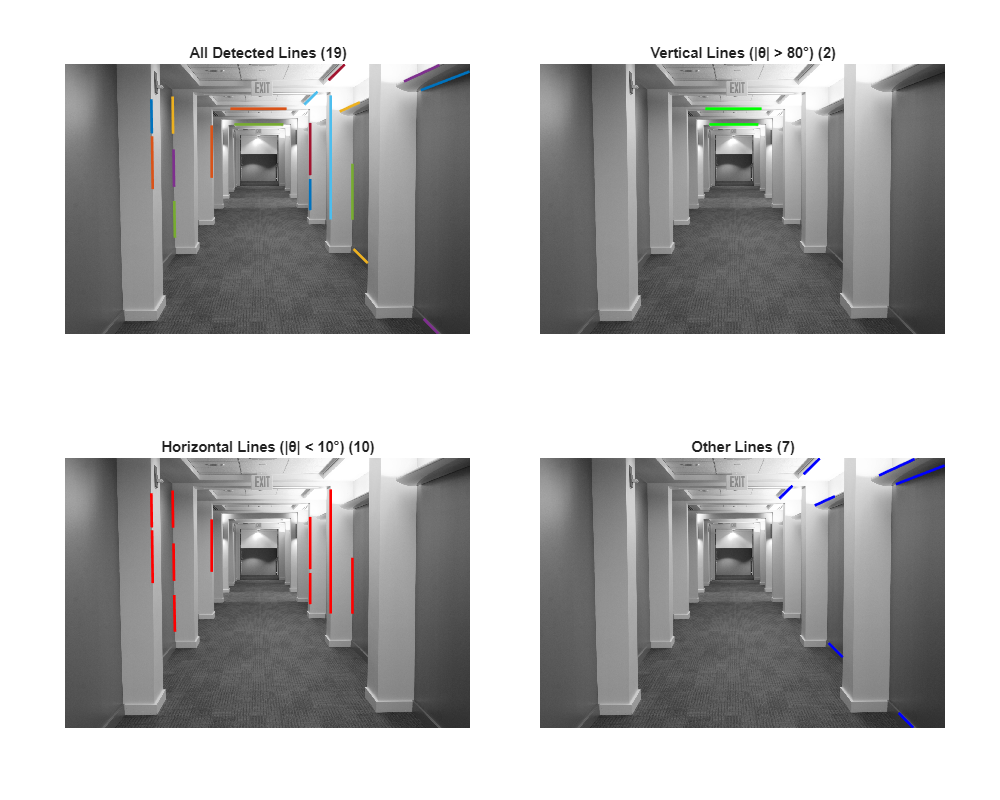

In [29]:

% Create a figure to visualize all detected lines
figure('Name', 'Line Detection Results', 'Position', [100, 100, 1000, 800]);
tiledlayout(2, 2, 'Padding', 'compact', 'TileSpacing', 'compact');

% Original image with all lines
ax1 = nexttile;
imshow(Irgb);
hold on;
for k = 1:length(lines)
    xy = [lines(k).point1; lines(k).point2];
    plot(xy(:,1), xy(:,2), 'LineWidth', 2);
end
title(sprintf('All Detected Lines (%d)', length(lines)));

% Vertical lines only
ax2 = nexttile;
imshow(Irgb);
hold on;
for k = 1:length(vertical_lines)
    xy = [vertical_lines(k).point1; vertical_lines(k).point2];
    plot(xy(:,1), xy(:,2), 'g-', 'LineWidth', 2);
end
title(sprintf('Vertical Lines (|θ| > %d°) (%d)', vertical_threshold, length(vertical_lines)));

% Horizontal lines only
ax3 = nexttile;
imshow(Irgb);
hold on;
for k = 1:length(horizontal_lines)
    xy = [horizontal_lines(k).point1; horizontal_lines(k).point2];
    plot(xy(:,1), xy(:,2), 'r-', 'LineWidth', 2);
end
title(sprintf('Horizontal Lines (|θ| < %d°) (%d)', horizontal_threshold, length(horizontal_lines)));

% Other lines
ax4 = nexttile;
imshow(Irgb);
hold on;
for k = 1:length(other_lines)
    xy = [other_lines(k).point1; other_lines(k).point2];
    plot(xy(:,1), xy(:,2), 'b-', 'LineWidth', 2);
end
title(sprintf('Other Lines (%d)', length(other_lines)));

if save_results
    saveas(gcf, 'hallway_line_detection.png');
end

# [PYTHON FOR HOUGH]

# Line Detection in Hallway Image using Hough Transform

This notebook demonstrates line detection in an image using the Canny edge detection algorithm and the Probabilistic Hough Transform. The process consists of the following steps:

1. Load and prepare the image
2. Apply edge detection using the Canny algorithm
3. Detect lines using the Probabilistic Hough Transform
4. Overlay the detected lines on the original image

## 1. Import Required Libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line

# Enable inline plotting
%matplotlib inline

## 2. Load and Prepare the Image

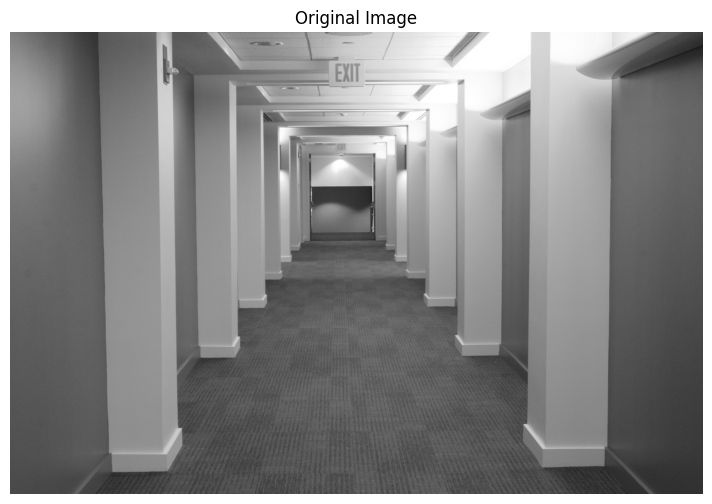

In [2]:
# Load and prepare the image
img_path = os.path.join("Images", "Ασκηση 6", "hallway.png")
img_rgb = Image.open(img_path).convert("RGB")
img = np.array(img_rgb)
gray = rgb2gray(img)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

## 3. Edge Detection

We'll use the Canny edge detection algorithm with a slightly higher sigma to reduce texture noise and tweaked low/high thresholds.

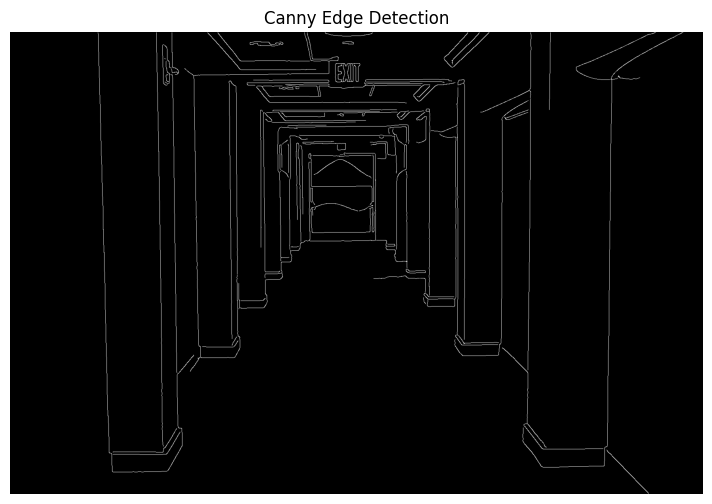

In [3]:
# Edge detection using Canny algorithm
edges = canny(gray, sigma=2.0, low_threshold=0.05, high_threshold=0.2)

# Display the edge-detected image
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edge Detection')
plt.show()

## 4. Probabilistic Hough Transform

The Probabilistic Hough Transform is an optimization of the standard Hough Transform that processes only a random subset of points. It returns line segments rather than the parameters of the line.

In [4]:
# Probabilistic Hough Transform to detect lines
lines = probabilistic_hough_line(
    edges,
    threshold=10,     # accumulator threshold
    line_length=60,   # minimum accepted line length
    line_gap=10       # maximum gap to allow connecting segments
)

print(f"Number of lines detected: {len(lines)}")
print(f"Example of a detected line: {lines[0] if lines else 'No lines detected'}")

Number of lines detected: 186
Example of a detected line: ((476, 790), (475, 712))


## 5. Overlay Detected Lines on the Original Image

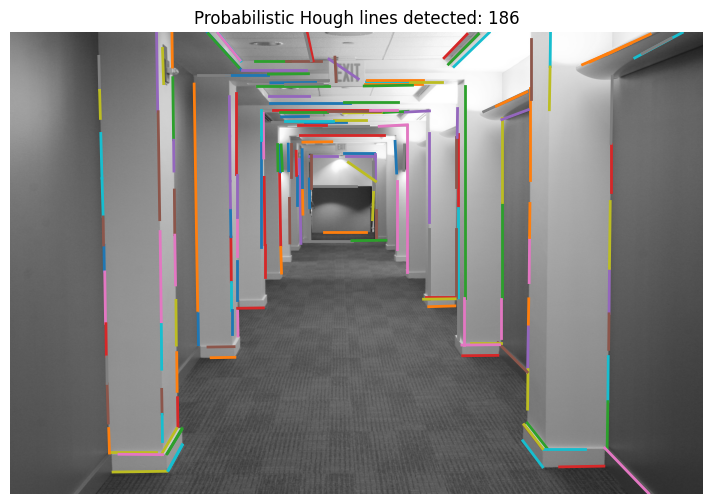

Overlay image saved to: hallway_hough.png


In [8]:
# Overlay detected lines on the original image
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)
for ((x0, y0), (x1, y1)) in lines:
    ax.plot([x0, x1], [y0, y1], linewidth=2)  # default color cycle
ax.set_axis_off()
ax.set_title(f"Probabilistic Hough lines detected: {len(lines)}")
plt.show()

# Save the overlay for downloading
overlay_path = "hallway_hough.png"
fig.savefig(overlay_path, bbox_inches="tight")
print(f"Overlay image saved to: {overlay_path}")

## 6. Experiment with Different Parameters (Optional)

You can experiment with different parameters for both the Canny edge detection and the Probabilistic Hough Transform to see how they affect the results.

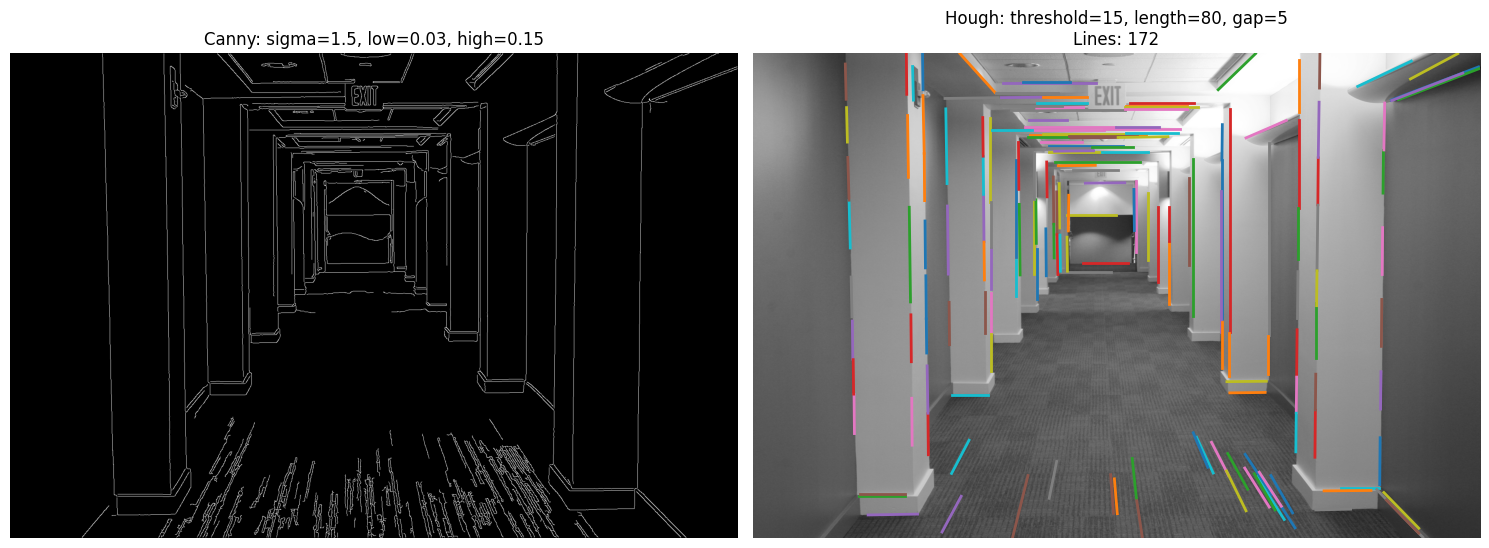

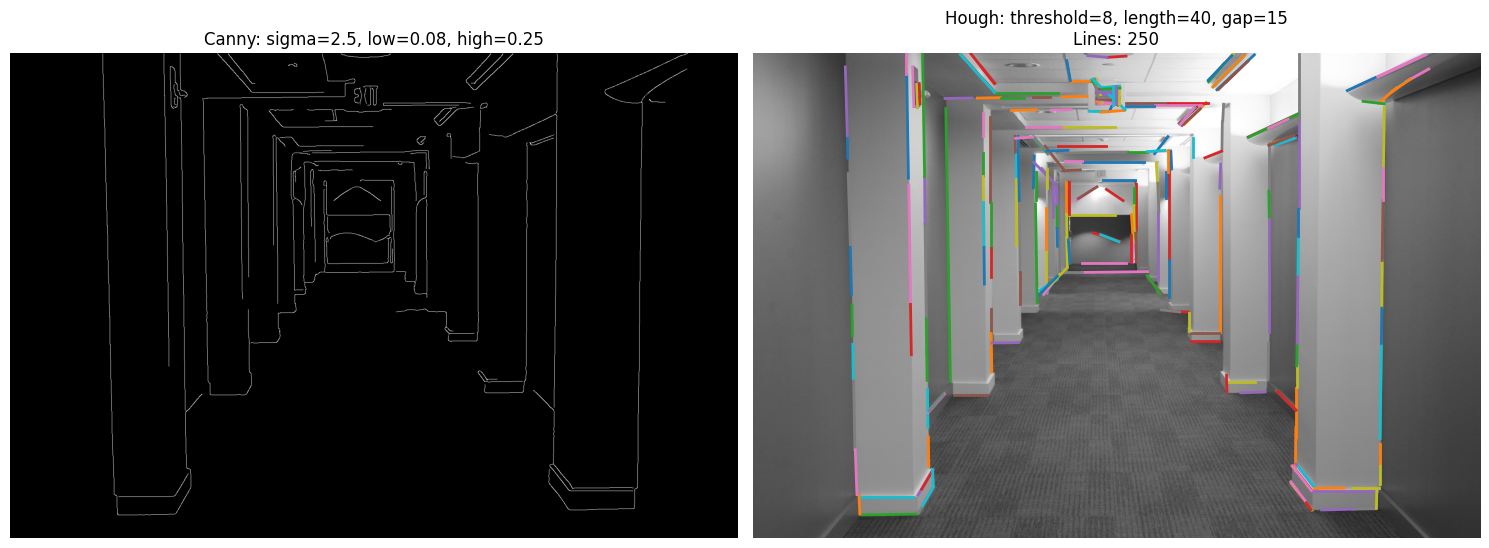

250

In [10]:
# Function to perform line detection with different parameters
def detect_lines(sigma, low_threshold, high_threshold, hough_threshold, min_line_length, max_line_gap):
    # Edge detection
    edges = canny(gray, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
    
    # Hough transform
    lines = probabilistic_hough_line(
        edges,
        threshold=hough_threshold,
        line_length=min_line_length,
        line_gap=max_line_gap
    )
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Edge detection result
    ax1.imshow(edges, cmap='gray')
    ax1.set_title(f'Canny: sigma={sigma}, low={low_threshold}, high={high_threshold}')
    ax1.set_axis_off()
    
    # Line detection result
    ax2.imshow(img)
    for ((x0, y0), (x1, y1)) in lines:
        ax2.plot([x0, x1], [y0, y1], linewidth=2)
    ax2.set_title(f'Hough: threshold={hough_threshold}, length={min_line_length}, gap={max_line_gap}\nLines: {len(lines)}')
    ax2.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
    return len(lines)

# Try with different parameters - uncomment to experiment
detect_lines(sigma=1.5, low_threshold=0.03, high_threshold=0.15, hough_threshold=15, min_line_length=80, max_line_gap=5)
detect_lines(sigma=2.5, low_threshold=0.08, high_threshold=0.25, hough_threshold=8, min_line_length=40, max_line_gap=15)